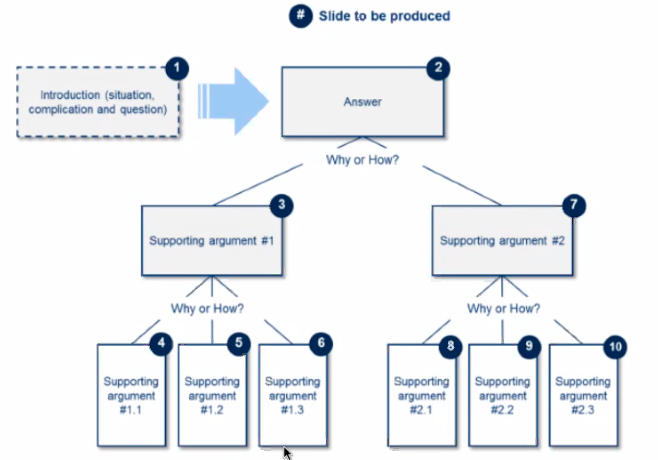

Report from an initial data examination
==============================

Two main recommendations:

+ Focusing resources on some locations
+ Working hand-in-hand with the Mayor's office

Current situation
-----------------

+ 


In [ ]:
import pandas as pd
import seaborn as sns

total_police_df = pd.reav("total_police_df.csv")

Focusing resources on some locations
------------------------------------



First, a methodology note (and good news!): we notice you don't use DISTINCT when extracting number of incidents, which overestimates a little the numbers
Example: Charleston 4765 -> 4300


In [ ]:
2 clear influences: married and grad
    

In [ ]:
Ran first correlation - sleaner correlation


In [ ]:
Adopt a "per year" approach"

In [ ]:
Implantation makes sense - how many policemen and women? How experienced?